In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler,power_transform
from sklearn.model_selection import train_test_split,cross_val_score,KFold
import joblib
import warnings
warnings.filterwarnings('ignore')
seed = 7


In [220]:
df = pd.read_csv("banknote.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [221]:
ds = pd.DataFrame(data = df)

In [222]:
ds

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [223]:
ds.shape

(1372, 5)

In [224]:
ds.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [225]:
ds.info

<bound method DataFrame.info of       variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [226]:
ds.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

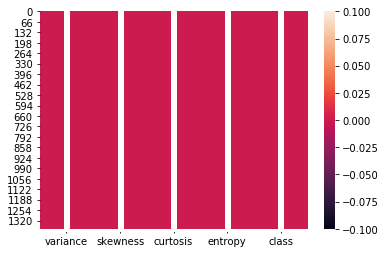

In [227]:
sns.heatmap(ds.isnull(), annot=True)

In [228]:
ds.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


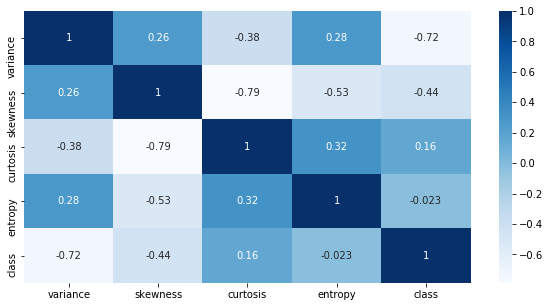

In [229]:
fig = plt.figure(figsize = (10,5))
hc = ds.corr(method = 'pearson')
sns.heatmap(hc, annot=True, cmap="Blues")

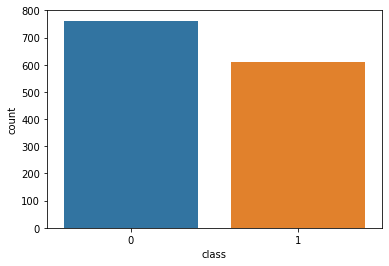

In [230]:
sns.countplot(x = "class", data = ds)

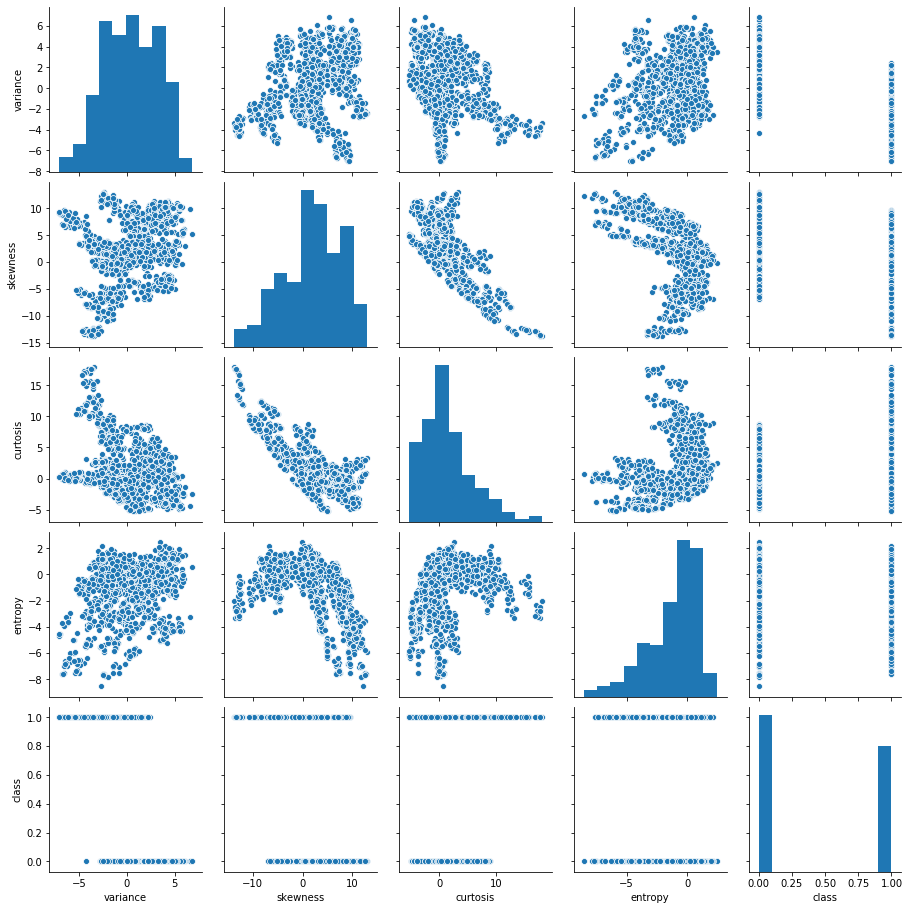

In [231]:
sns.pairplot(ds)

In [232]:
ds.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

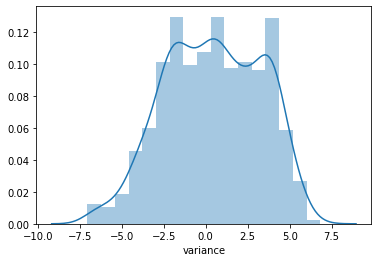

In [233]:
sns.distplot(ds["variance"])

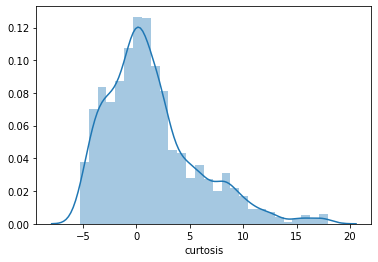

In [234]:
sns.distplot(ds["curtosis"])

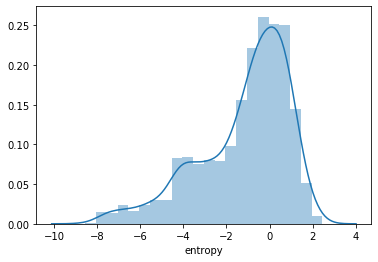

In [235]:
sns.distplot(ds['entropy'])

In [236]:
ds.sample(2)

,variance,skewness,curtosis,entropy,class
679,0.77805,6.6424,-1.1425,-1.05730,0
956,-1.07440,-6.3113,5.3550,0.80472,1


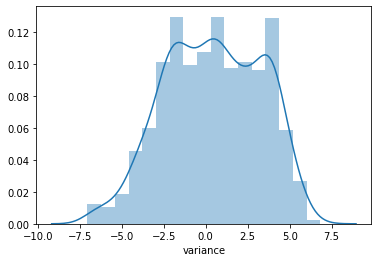

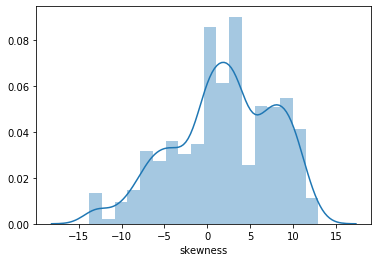

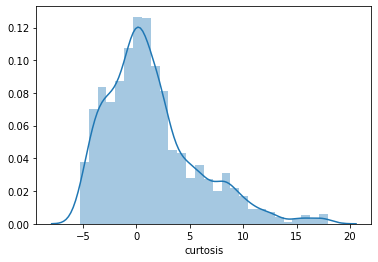

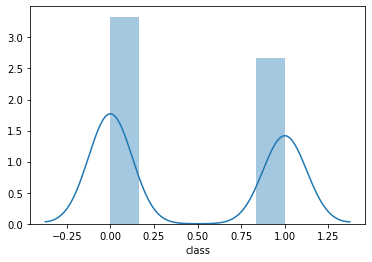

In [237]:
columns = ["variance", "skewness","curtosis","class"]
for i in ds[columns]:
    plt.figure()
    sns.distplot(ds[i])

variance       AxesSubplot(0.125,0.125;0.133621x0.755)
skewness    AxesSubplot(0.285345,0.125;0.133621x0.755)
curtosis     AxesSubplot(0.44569,0.125;0.133621x0.755)
entropy     AxesSubplot(0.606034,0.125;0.133621x0.755)
class       AxesSubplot(0.766379,0.125;0.133621x0.755)
dtype: object

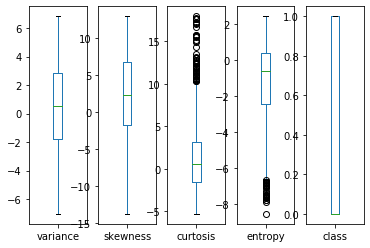

In [238]:
ds.plot(kind = 'box', subplots = True, layout = (1,5))

In [239]:
zscr = np.abs(zscore(ds))

thershold = 3
print(np.where(zscr>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369]), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2]))


In [240]:
zscr[194][3]

3.0434241775405813

In [241]:
print("shape before the outliers", ds.shape)

dsnew = ds[(zscr<3).all(axis = 1)]

print("shape after removing outliers is", dsnew.shape)

shape before the outliers (1372, 5)
shape after removing outliers is (1336, 5)


In [242]:
ds = dsnew

In [243]:
ds

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.80730,-0.44699,0
1,4.54590,8.16740,-2.45860,-1.46210,0
2,3.86600,-2.63830,1.92420,0.10645,0
3,3.45660,9.52280,-4.01120,-3.59440,0
4,0.32924,-4.45520,4.57180,-0.98880,0
...,...,...,...,...,...
1366,-2.41000,3.74330,-0.40215,-1.29530,1
1367,0.40614,1.34920,-1.45010,-0.55949,1
1368,-1.38870,-4.87730,6.47740,0.34179,1
1370,-3.56370,-8.38270,12.39300,-1.28230,1


In [244]:
x = ds.drop(columns = ['class'])
y = ds[['class']]

In [245]:
x, x.shape

(      variance  skewness  curtosis  entropy
 0      3.62160   8.66610  -2.80730 -0.44699
 1      4.54590   8.16740  -2.45860 -1.46210
 2      3.86600  -2.63830   1.92420  0.10645
 3      3.45660   9.52280  -4.01120 -3.59440
 4      0.32924  -4.45520   4.57180 -0.98880
 ...        ...       ...       ...      ...
 1366  -2.41000   3.74330  -0.40215 -1.29530
 1367   0.40614   1.34920  -1.45010 -0.55949
 1368  -1.38870  -4.87730   6.47740  0.34179
 1370  -3.56370  -8.38270  12.39300 -1.28230
 1371  -2.54190  -0.65804   2.68420  1.19520
 
 [1336 rows x 4 columns],
 (1336, 4))

In [246]:
y, y.shape

(      class
 0         0
 1         0
 2         0
 3         0
 4         0
 ...     ...
 1366      1
 1367      1
 1368      1
 1370      1
 1371      1
 
 [1336 rows x 1 columns],
 (1336, 1))

In [247]:
for i in x.columns:
    if x[i].skew() > 0.5:
        x[i] = np.cbrt(x[i])
    if x[i].skew() < -0.5:
        x[i] = np.cbrt(x[i])
        
x.skew()
    

variance   -0.165024
skewness   -0.298058
curtosis   -0.144276
entropy     0.367667
dtype: float64

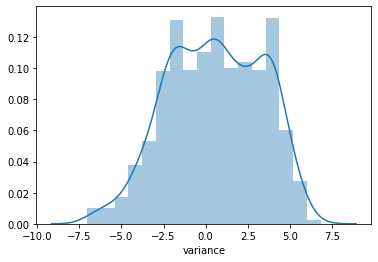

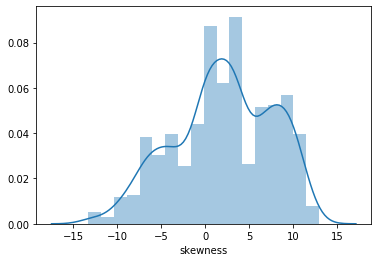

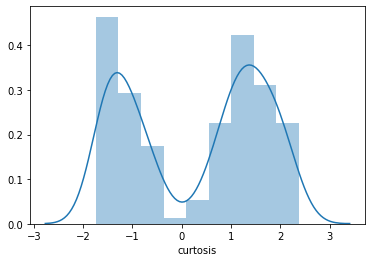

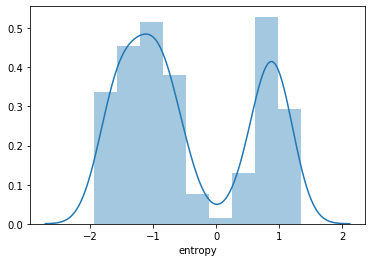

In [248]:
columns = ["variance", "skewness", "curtosis", "entropy"]
for i in x[columns]:
    plt.figure()
    sns.distplot(x[i])

In [249]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-1.410684,-0.764597
1,4.54590,8.16740,-1.349675,-1.134991
2,3.86600,-2.63830,1.243799,0.473931
3,3.45660,9.52280,-1.588881,-1.531824
4,0.32924,-4.45520,1.659698,-0.996253
...,...,...,...,...
1366,-2.41000,3.74330,-0.738124,-1.090076
1367,0.40614,1.34920,-1.131877,-0.824007
1368,-1.38870,-4.87730,1.864090,0.699176
1370,-3.56370,-8.38270,2.314153,-1.086417


In [250]:
from sklearn.preprocessing import StandardScaler

standard = StandardScaler()

ds_x = standard.fit_transform(x)

ds_x = pd.DataFrame(ds_x, columns=x.columns)

ds_x

,variance,skewness,curtosis,entropy
0,1.103540,1.186418,-1.238451,-0.308941
1,1.434725,1.097028,-1.193664,-0.672026
2,1.191111,-0.839847,0.710251,0.905149
3,1.044419,1.339977,-1.369269,-1.061029
4,-0.076142,-1.165518,1.015570,-0.536026
...,...,...,...,...
1331,-1.057636,0.304027,-0.744713,-0.627998
1332,-0.048588,-0.125105,-1.033774,-0.367179
1333,-0.691695,-1.241178,1.165618,1.125950
1334,-1.471016,-1.869505,1.496017,-0.624411


In [251]:
x = ds_x

In [252]:
x

,variance,skewness,curtosis,entropy
0,1.103540,1.186418,-1.238451,-0.308941
1,1.434725,1.097028,-1.193664,-0.672026
2,1.191111,-0.839847,0.710251,0.905149
3,1.044419,1.339977,-1.369269,-1.061029
4,-0.076142,-1.165518,1.015570,-0.536026
...,...,...,...,...
1331,-1.057636,0.304027,-0.744713,-0.627998
1332,-0.048588,-0.125105,-1.033774,-0.367179
1333,-0.691695,-1.241178,1.165618,1.125950
1334,-1.471016,-1.869505,1.496017,-0.624411


In [253]:
x.shape

(1336, 4)

In [254]:
y.shape

(1336, 1)

In [255]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = seed)
print(x.shape, x_train.shape,x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(1336, 4) (895, 4) (441, 4)
(1336, 1) (895, 1) (441, 1)


In [258]:

models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('DEC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ABC', AdaBoostClassifier()))

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_score = cross_val_score(model, x_train, y_train, cv = kfold, scoring='accuracy')
    
    results.append(cv_score)
    names.append(name)
    
    msg = '%s: %f %f' %(name, cv_score.mean(), cv_score.std())
    print(msg)

LR: 0.991049 0.009758
NB: 0.881511 0.019845
SVC: 0.998889 0.003333
DEC: 0.978714 0.017024
RFC: 0.993283 0.007438
ABC: 0.993283 0.007438


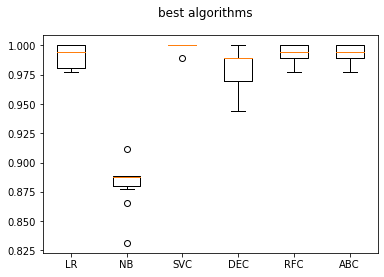

In [259]:
fig = plt.figure()
fig.suptitle("best algorithms")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [260]:
svc = SVC()
svc.fit(x_train, y_train)
predictmodel = svc.predict(x_test)
print(predictmodel)
print(accuracy_score(y_test,predictmodel))
print(classification_report(y_test, predictmodel))
print(confusion_matrix(y_test, predictmodel))

[1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1
 0 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0
 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   

In [263]:
import joblib
joblib.dump(SVC, "Servicevectormachine_for_bank")

['Servicevectormachine_for_bank']

In [264]:
obj = joblib.load("Servicevectormachine_for_bank")